# Callbacks

## 模型

In [1]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist

# 載入 MNIST 手寫阿拉伯數字資料
(x_train, y_train),(x_test, y_test) = mnist.load_data()

# 特徵縮放，使用常態化(Normalization)，公式 = (x - min) / (max - min)
x_train_norm, x_test_norm = x_train / 255.0, x_test / 255.0

# 建立模型
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

# 設定優化器(optimizer)、損失函數(loss)、效能衡量指標(metrics)的類別
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


## EarlyStopping callbacks

In [15]:
# validation loss 三個執行週期沒改善就停止訓練
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=3, monitor = 'val_accuracy'),
]

In [16]:
# 訓練 20 次，但實際只訓練 12次就停止了
history = model.fit(x_train_norm, y_train, epochs=20, validation_split=0.2, 
                    callbacks=my_callbacks)

Epoch 1/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0158 - accuracy: 0.9942 - val_loss: 0.1002 - val_accuracy: 0.9799
Epoch 2/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0183 - accuracy: 0.9937 - val_loss: 0.0969 - val_accuracy: 0.9791
Epoch 3/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0144 - accuracy: 0.9949 - val_loss: 0.0968 - val_accuracy: 0.9808
Epoch 4/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0131 - accuracy: 0.9953 - val_loss: 0.0960 - val_accuracy: 0.9804
Epoch 5/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0150 - accuracy: 0.9948 - val_loss: 0.0900 - val_accuracy: 0.9805
Epoch 6/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0136 - accuracy: 0.9954 - val_loss: 0.0912 - val_accuracy: 0.9819
Epoch 7/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0128 - accuracy: 0.9954 - val_loss: 0.0962 - val_accuracy:

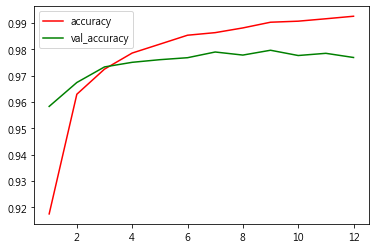

In [12]:
# 對訓練過程的準確度繪圖
import matplotlib.pyplot as plt
import numpy as np

plt.plot(np.arange(1,len(history.history['accuracy'])+1), history.history['accuracy'], 'r', label='accuracy')
plt.plot(np.arange(1,len(history.history['accuracy'])+1), history.history['val_accuracy'], 'g', label='val_accuracy')
plt.legend()

## 改為 val_loss

In [19]:
# validation loss 三個執行週期沒改善就停止訓練
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=3, monitor = 'val_loss'),
]

In [20]:
# 訓練 20 次，但實際只訓練 12次就停止了
history = model.fit(x_train_norm, y_train, epochs=20, validation_split=0.2, 
                    callbacks=my_callbacks)

Epoch 1/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0128 - accuracy: 0.9958 - val_loss: 0.1216 - val_accuracy: 0.9805
Epoch 2/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0092 - accuracy: 0.9970 - val_loss: 0.1249 - val_accuracy: 0.9804
Epoch 3/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0111 - accuracy: 0.9964 - val_loss: 0.1259 - val_accuracy: 0.9790
Epoch 4/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0086 - accuracy: 0.9970 - val_loss: 0.1226 - val_accuracy: 0.9801


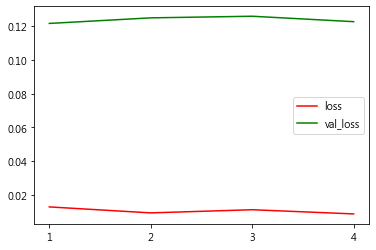

In [24]:
# 對訓練過程的準確度繪圖
import matplotlib.pyplot as plt
import numpy as np

plt.plot(np.arange(1,len(history.history['loss'])+1), history.history['loss'], 'r', label='loss')
plt.plot(np.arange(1,len(history.history['loss'])+1), history.history['val_loss'], 'g', label='val_loss')
plt.xticks(ticks=np.arange(1,len(history.history['loss'])+1))
plt.legend()

In [25]:
# 評估，打分數
score=model.evaluate(x_test_norm, y_test, verbose=0)
score

[0.10199097543954849, 0.9833999872207642]

## ModelCheckpoint callback

In [3]:
# 定義 ModelCheckpoint callback
checkpoint_filepath = 'model.{epoch:02d}.h5' # 存檔名稱，可用 f-string 變數
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath, # 設定存檔名稱
    save_weights_only=True,       # 只存權重
    monitor='val_accuracy',       # 監看驗證資料的準確率
    mode='max',           # 設定save_best_only=True時，best是指 max or min
    save_best_only=True)          # 只存最好的模型

EPOCHS = 3  # 訓練 3 次
model.fit(x_train_norm, y_train, epochs=EPOCHS, validation_split=0.2, 
          callbacks=[model_checkpoint_callback])

Epoch 1/3
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0652 - accuracy: 0.9796 - val_loss: 0.0521 - val_accuracy: 0.9843
Epoch 2/3
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0520 - accuracy: 0.9835 - val_loss: 0.0502 - val_accuracy: 0.9844
Epoch 3/3
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0431 - accuracy: 0.9859 - val_loss: 0.0450 - val_accuracy: 0.9863


In [4]:
# 再訓練 3 次，觀察 accuracy，會接續上一次，繼續改善 accuracy。
model.fit(x_train_norm, y_train, epochs=EPOCHS, validation_split=0.2,  
          callbacks=[model_checkpoint_callback])

Epoch 1/3
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0378 - accuracy: 0.9876 - val_loss: 0.0559 - val_accuracy: 0.9842
Epoch 2/3
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0316 - accuracy: 0.9892 - val_loss: 0.0580 - val_accuracy: 0.9827
Epoch 3/3
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0300 - accuracy: 0.9902 - val_loss: 0.0548 - val_accuracy: 0.9837


## TensorBoard callback

In [2]:
# 定義 tensorboard callback
tensorboard_callback = [tf.keras.callbacks.TensorBoard(log_dir='.\\logs', 
                       histogram_freq=1)]

# 訓練 5 次
history = model.fit(x_train_norm, y_train, epochs=5, validation_split=0.2,
                    callbacks=tensorboard_callback)

Epoch 1/5
1500/1500 [==============================] - 8s 5ms/step - loss: 0.4625 - accuracy: 0.8616 - val_loss: 0.1400 - val_accuracy: 0.9582
Epoch 2/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1356 - accuracy: 0.9598 - val_loss: 0.1104 - val_accuracy: 0.9668
Epoch 3/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0945 - accuracy: 0.9718 - val_loss: 0.0951 - val_accuracy: 0.9733
Epoch 4/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0710 - accuracy: 0.9778 - val_loss: 0.0860 - val_accuracy: 0.9752
Epoch 5/5
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0544 - accuracy: 0.9828 - val_loss: 0.0815 - val_accuracy: 0.9764


In [ ]:
# 載入 TensorBoard notebook extension，即可在 jupyter notebook 啟動 Tensorboard
%load_ext tensorboard

# 啟動 Tensorboard
%tensorboard --logdir ./logs

In [ ]:
# 可同時定義多個Callback事件
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=3),
    tf.keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}.h5'),
    tf.keras.callbacks.TensorBoard(log_dir='./logs'),
]
model.fit(x_train_norm, y_train, epochs=10, callbacks=my_callbacks)